# YouTube Category Insights: Unveiling the Most Popular Genres in 2023

In the ever-evolving realm of online video content, YouTube stands as a global giant, providing a platform for creators to share their creativity with a vast and diverse audience. This notebook is dedicated to the analysis of YouTube in the year 2023, with a particular focus on unraveling the mysteries of genre popularity.

As we journey through the data, we aim to discover which video genres have garnered the most attention and engagement from viewers in the past year. Through data-driven exploration and visualization, we will highlight the genres that have thrived and explore the factors contributing to their success.

Whether you're a content creator seeking inspiration or a data enthusiast intrigued by the YouTube landscape, this analysis aims to provide valuable insights into the content genres that have resonated with audiences in 2023.

The dataset that is used has been taken from [Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023).

### Questions That Will Be Answered:
1. Which YouTube categories have the highest total video views?
2. What are the top YouTube categories in terms of subscribers?
3. What is the number of uploads per category?
4. What categories performed the best and which YouTubers lead them?

## Data Loading

__Step 1:__ Importing Required Libraries:

In [612]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

__Step 2:__ Loading the dataset into a pandas dataframe:

In [613]:
df = pd.read_csv('ytstatistics.csv', encoding='utf-8', encoding_errors='replace')

## Data Cleaning

__Step 1:__ Removing unneeded columns:

In [614]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [615]:
unneeded_columns = ['Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population',
                    'Latitude', 'Longitude', 'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank',
                    'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings',
                    'lowest_yearly_earnings', 'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year',
                    'created_month', 'created_date', 'Title', 'Country', 'Abbreviation'
                    ]

df = df.drop(unneeded_columns, axis=1)

__Step 2:__ Removing unneccessary Null values:

In [616]:
df = df[df['video views'] != 0]
df = df[~df['category'].isna()]

__Step 3:__ Removing error values:

In [617]:
# Most of the channels with upload values less than 20 have wrong upload values.
df = df[df['uploads'] > 20]

__Step 4:__ Removing unrecognizable symbols:

In [618]:
# Iterate through all columns in the DataFrame
for column in df.columns:
    # Check if the column contains text data (strings)
    if df[column].dtype == 'object':
        # Remove non-alphanumeric characters from text columns
        df[column] = df[column].str.replace(r'[^a-zA-Z0-9\s&]', '', regex=True)

__Step 5:__ Re-ranking all the observations:

In [619]:
# Recompute ranks based on the 'subscribers' column
df['rank'] = df['subscribers'].rank(ascending=False).astype(int)

## Data Exploration

In [620]:
df.head()

,rank,Youtuber,subscribers,video views,category,uploads
0,1,TSeries,245000000,2.280000e+11,Music,20082
2,2,MrBeast,166000000,2.836884e+10,Entertainment,741
3,3,Cocomelon Nursery Rhymes,162000000,1.640000e+11,Education,966
4,4,SET India,159000000,1.480000e+11,Shows,116536
6,5,Kids Diana Show,112000000,9.324704e+10,People & Blogs,1111


In [621]:
df.describe()

,rank,subscribers,video views,uploads
count,836.000000,8.360000e+02,8.360000e+02,836.000000
mean,418.271531,2.264282e+07,1.145121e+10,10885.224880
std,241.449315,1.714076e+07,1.498330e+10,37013.995621
min,1.000000,1.230000e+07,1.066458e+07,21.000000
25%,208.000000,1.450000e+07,4.351711e+09,376.500000
50%,418.000000,1.760000e+07,7.867056e+09,1002.500000
75%,625.000000,2.410000e+07,1.390281e+10,3654.750000
max,834.000000,2.450000e+08,2.280000e+11,301308.000000


## Data Analysis

### __Question 1:__ Which YouTube categories have the highest total video views?

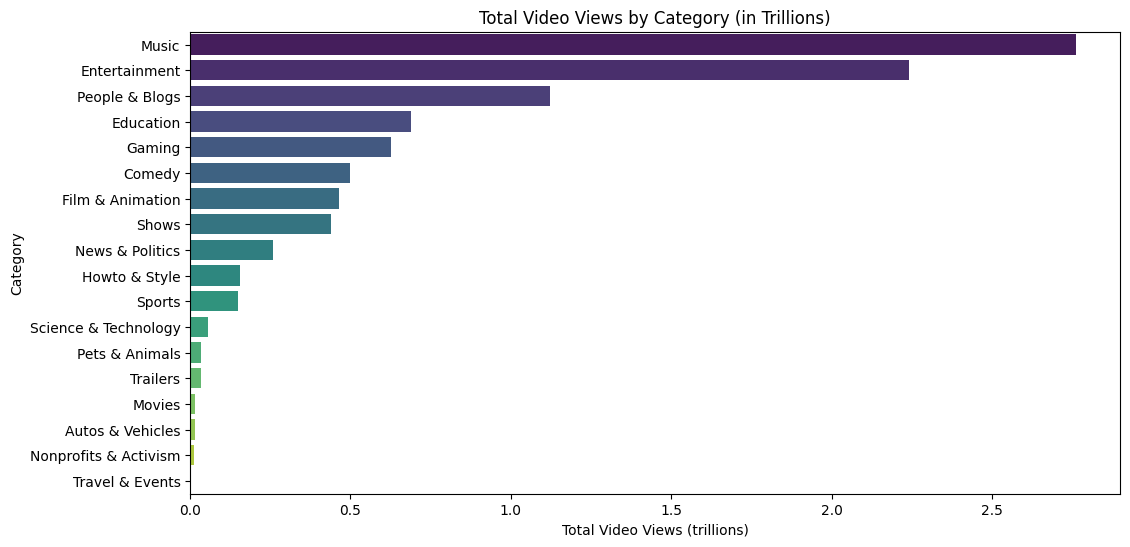

In [622]:
# Group data by 'category' and calculate the sum of video views
total_views_by_category = df.groupby('category')['video views'].sum().reset_index()

# Convert total views to trillions
total_views_by_category['Total Video Views (trillions)'] = total_views_by_category['video views'] / 1e12

# Sort the DataFrame by total views in descending order
total_views_by_category = total_views_by_category.sort_values(by='Total Video Views (trillions)', ascending=False)

# Create a bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Video Views (trillions)', y='category', data=total_views_by_category, palette='viridis')

# Add labels and title
plt.xlabel('Total Video Views (trillions)')
plt.ylabel('Category')
plt.title('Total Video Views by Category (in Trillions)')

# Show the plot
plt.show()


### __Question 2:__ What are the top YouTube categories in terms of subscribers?

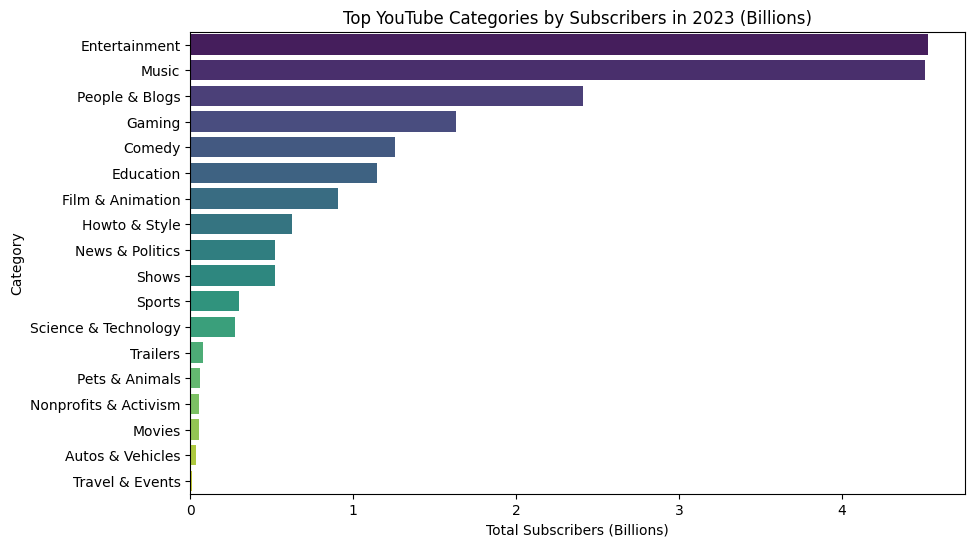

In [623]:
# Group the data by category and calculate total subscribers in billions
subscribers_by_category = df.groupby('category')['subscribers'].sum().reset_index()
subscribers_by_category['Total Subscribers (Billions)'] = subscribers_by_category['subscribers'] / 1e9

# Sort the data by total subscribers in descending order
subscribers_by_category = subscribers_by_category.sort_values(by='Total Subscribers (Billions)', ascending=False)

# Create a bar chart to visualize the top categories by subscribers
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Subscribers (Billions)', y='category', data=subscribers_by_category, palette='viridis')
plt.xlabel('Total Subscribers (Billions)')
plt.ylabel('Category')
plt.title('Top YouTube Categories by Subscribers in 2023 (Billions)')
plt.show()

### __Question 3:__ What is the number of uploads per category?

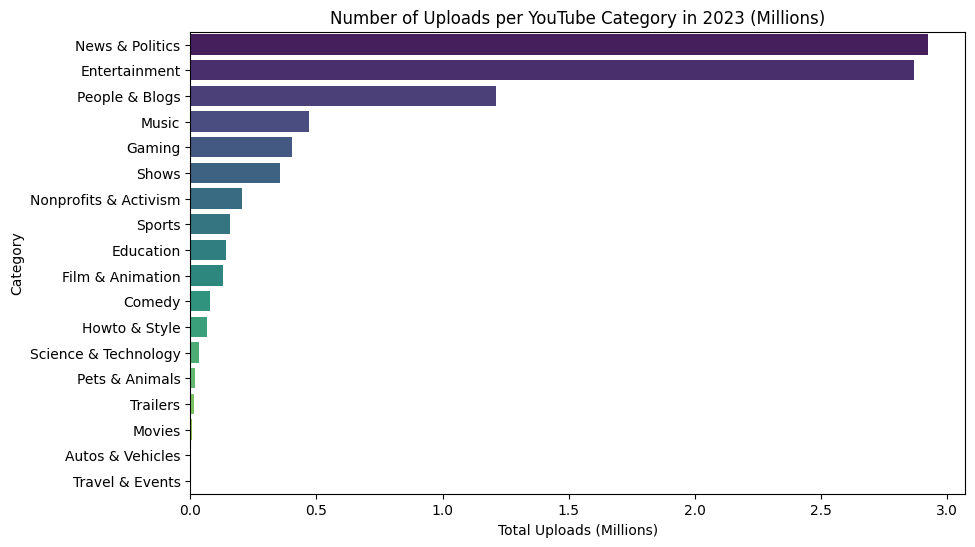

In [624]:
# Group the data by category and calculate total uploads in millions
uploads_by_category = df.groupby('category')['uploads'].sum().reset_index()
uploads_by_category['Total Uploads (Millions)'] = uploads_by_category['uploads'] / 1e6

# Sort the data by total uploads in descending order
uploads_by_category = uploads_by_category.sort_values(by='Total Uploads (Millions)', ascending=False)

# Create a bar chart to visualize the number of uploads per category
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Uploads (Millions)', y='category', data=uploads_by_category, palette='viridis')
plt.xlabel('Total Uploads (Millions)')
plt.ylabel('Category')
plt.title('Number of Uploads per YouTube Category in 2023 (Millions)')
plt.show()

### __Question 4:__ What categories performed the best and which YouTubers lead them?

* The categories with the most views are __Music__ and __Entertainment__, having a significant lead as compared to the other categories, and Music has a visible lead over Entertainment.
* The categories with the most subscriber are yet again __Entertainment__ and __Music__. With yet again a significant lead over the rest of the categories. They are very close to each other with Entertainment taking the lead.
* While __Entertainment__ is the second highest category uploads wise, backing up its high performance, __Music__ has very few uploads yet performs on par if not greater with Entertainment. Since we can deduce using common sense that Music is a form of content that is generally watched over multiple times by the same people, why it has the number of views it has is cleared.
* Therefore I have concluded that the best performing categories are 1.__Music__ and 2.__Entertainment__.

#### 1. Music
The leaders in music are as follows:

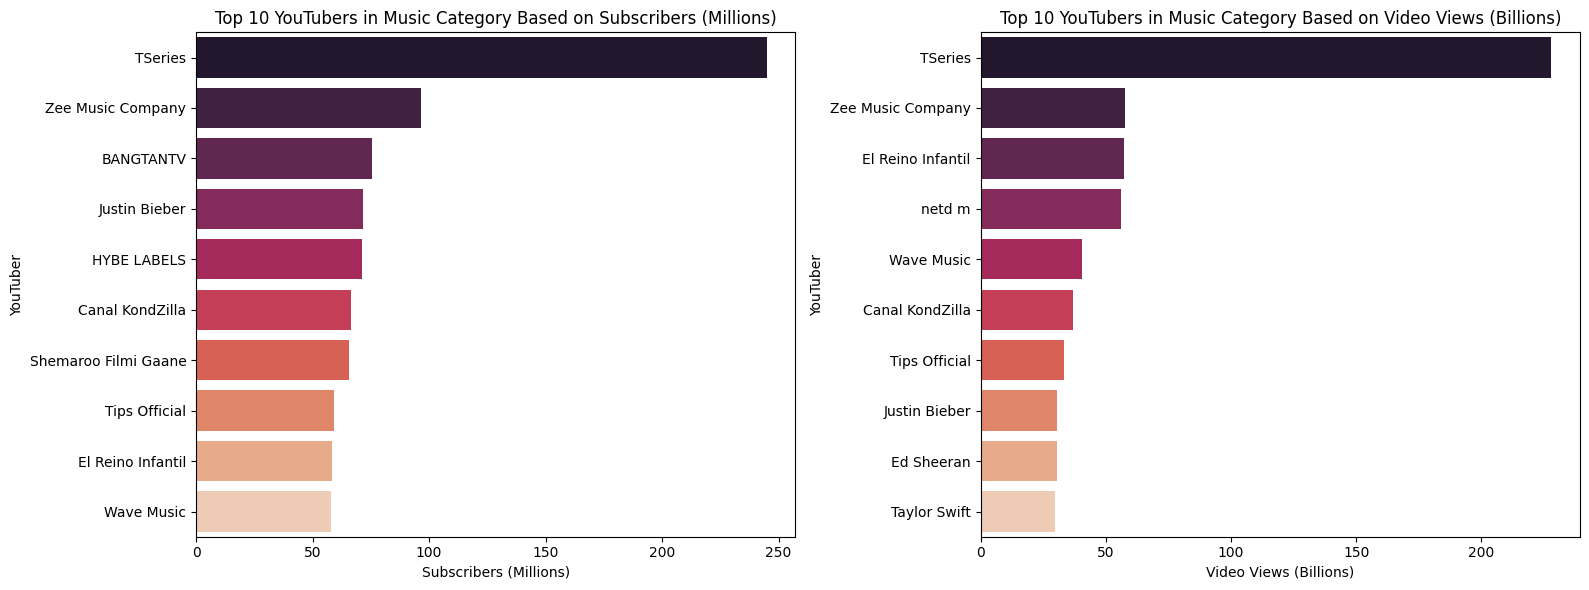

In [625]:

# Filter the dataset for the 'Music' category
music_df = df[df['category'] == 'Music']

# Sort the 'Music' DataFrame by subscribers and video views in descending order to identify the top 10 channels
top_10_music_subscribers = music_df.sort_values(by='subscribers', ascending=False).head(10)
top_10_music_views = music_df.sort_values(by='video views', ascending=False).head(10)

# Convert subscribers to millions
top_10_music_subscribers['Subscribers (Millions)'] = top_10_music_subscribers['subscribers'] / 1e6

# Convert video views to billions
top_10_music_views['Video Views (Billions)'] = top_10_music_views['video views'] / 1e9

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Horizontal bar chart for 'Music' category based on subscribers
sns.barplot(x='Subscribers (Millions)', y='Youtuber', data=top_10_music_subscribers, palette='rocket', ax=axes[0])
axes[0].set_xlabel('Subscribers (Millions)')
axes[0].set_ylabel('YouTuber')
axes[0].set_title('Top 10 YouTubers in Music Category Based on Subscribers (Millions)')

# Horizontal bar chart for 'Music' category based on video views in billions
sns.barplot(x='Video Views (Billions)', y='Youtuber', data=top_10_music_views, palette='rocket', ax=axes[1])
axes[1].set_xlabel('Video Views (Billions)')
axes[1].set_ylabel('YouTuber')
axes[1].set_title('Top 10 YouTubers in Music Category Based on Video Views (Billions)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

#### 2.Entertainment
The leaders in entertainment are as follows:

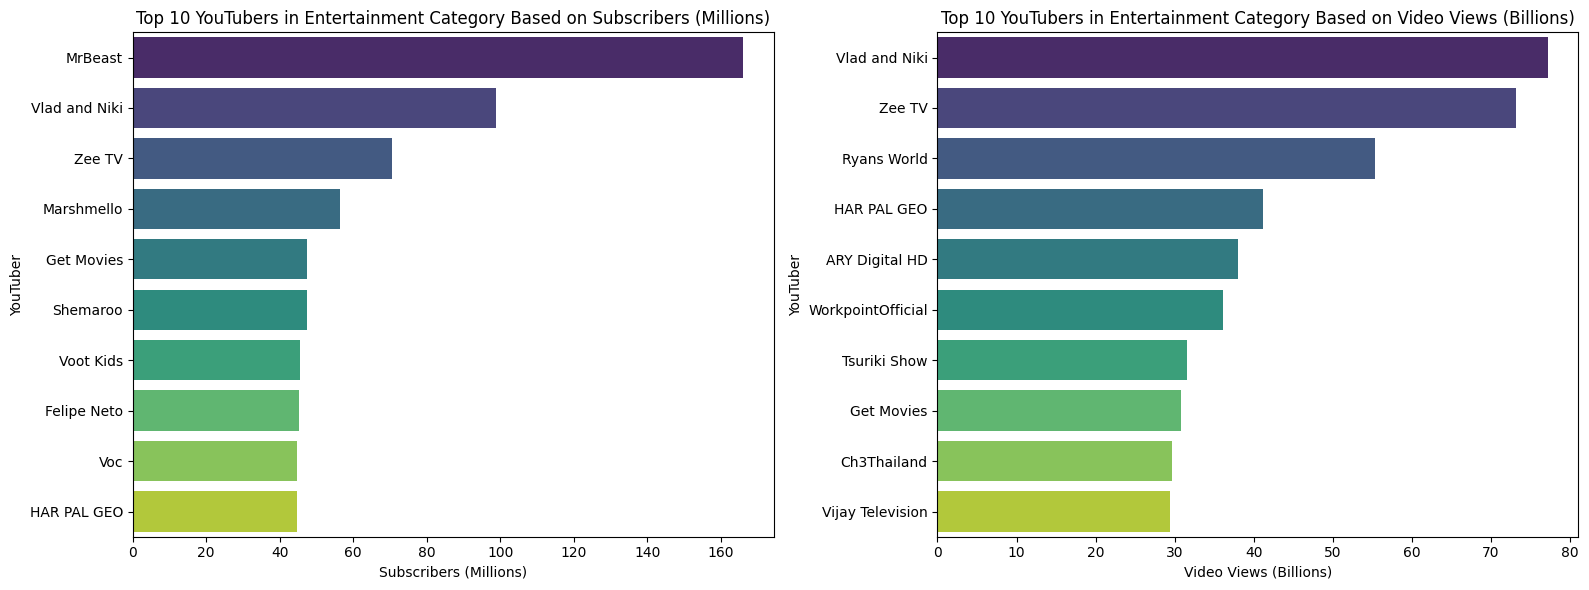

In [626]:
# Filter the dataset for the 'Entertainment' category
entertainment_df = df[df['category'] == 'Entertainment']

# Sort the 'Entertainment' DataFrame by subscribers and video views in descending order to identify the top 10 channels
top_10_entertainment_subscribers = entertainment_df.sort_values(by='subscribers', ascending=False).head(10)
top_10_entertainment_views = entertainment_df.sort_values(by='video views', ascending=False).head(10)

# Convert subscribers to millions
top_10_entertainment_subscribers['Subscribers (Millions)'] = top_10_entertainment_subscribers['subscribers'] / 1e6

# Convert video views to billions
top_10_entertainment_views['Video Views (Billions)'] = top_10_entertainment_views['video views'] / 1e9

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Horizontal bar chart for 'Entertainment' category based on subscribers
sns.barplot(x='Subscribers (Millions)', y='Youtuber', data=top_10_entertainment_subscribers, palette='viridis', ax=axes[0])
axes[0].set_xlabel('Subscribers (Millions)')
axes[0].set_ylabel('YouTuber')
axes[0].set_title('Top 10 YouTubers in Entertainment Category Based on Subscribers (Millions)')

# Horizontal bar chart for 'Entertainment' category based on video views in billions
sns.barplot(x='Video Views (Billions)', y='Youtuber', data=top_10_entertainment_views, palette='viridis', ax=axes[1])
axes[1].set_xlabel('Video Views (Billions)')
axes[1].set_ylabel('YouTuber')
axes[1].set_title('Top 10 YouTubers in Entertainment Category Based on Video Views (Billions)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

## Conclusion
TO conclude, we have found that Music and Entertainment were the most popular genres of 2023. 

## Recommendations
I suggest that youtube should focus on promoting its other genres of content like education, comedy, science & technology, to maintain a proper balance. This balance is what differenciates youtube from other platforms like spotify which is mostly music.

## Author
Mir Maahir Ali